# Eksperymenty sprawdzające zaimplementowany algorytm PBIL

In [1]:
from dynamic import Dynamic_algorithm_knapsack_problem
from heuristic import HeuristicMethodKnapsackProblem
from pbil import PBIL_knapsack_problem
from astar import Astar

import generate_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

MAX_WEIGHT = 20
N_OF_ITEMS = [10, 20, 30, 50, 100, 500]
pd.set_option("display.max_rows", None)


# 1) Parametry algorytmu PBIL

### a) Badanie wpływu współczynnika lr

Dynamic model solution:  387.65


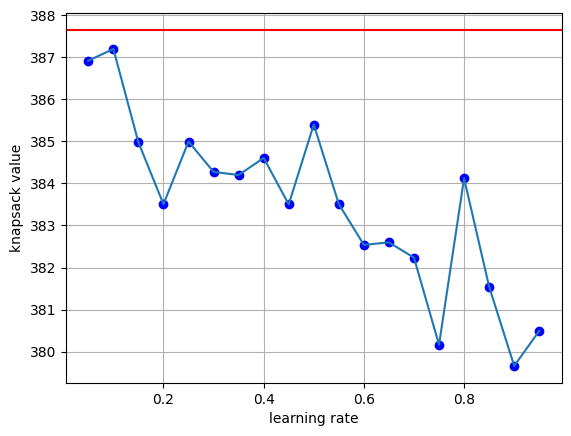

In [10]:
lrs = []
results = []
data = generate_data.generate_uncorrelated(num_of_items=50, max_weight=MAX_WEIGHT)
sum_weight = sum([item[1] for item in data])
capacity = int(sum_weight // 2)
for lr in range(1, 20):
    lr = lr / 20
    pbil_model = PBIL_knapsack_problem(lr=lr, M=100, N=50)
    pbil_model.get_data(dataset=data, knapsack_capacity=capacity)
    avg_result = 0
    for _ in range(10):
        avg_result += pbil_model.solve_knapsack_problem()
    lrs.append(lr)
    results.append(avg_result / 10)

dynamic_model = Dynamic_algorithm_knapsack_problem()
dynamic_model.get_data(dataset=data, knapsack_capacity=capacity)
dynamic_result = round(dynamic_model.solve_knapsack_problem(), 2)
print("Dynamic model solution: ", dynamic_result)

plt.clf()
plt.plot(lrs, results, 'bo', lrs, results)
plt.axhline(y = dynamic_result, color = 'r', linestyle = '-')
plt.xlabel("learning rate")
plt.ylabel("knapsack value")
plt.grid(True)


### b) Badanie wpływu parametrów M, N 

In [ ]:

results, Ms, Ns = [], [0.5, 1, 1.5, 2, 2.5, 3, 5, 8, 10], [0.25, 0.5, 0.75, 1, 1.5, 2, 3]
data = generate_data.generate_uncorrelated(num_of_items=50, max_weight=MAX_WEIGHT)
sum_weight = sum([item[1] for item in data])
capacity = int(sum_weight // 2)
for M in Ms:
    for N in Ns:
        if N > M:
            results.append(0)
            continue
        pbil_model = PBIL_knapsack_problem(lr=0.8, M=int(M * 50), N=int(N * 50))
        pbil_model.get_data(dataset=data, knapsack_capacity=capacity)
        avg_result = 0
        for _ in range(10):
            avg_result += pbil_model.solve_knapsack_problem()
        results.append(avg_result / 10)

dynamic_model = Dynamic_algorithm_knapsack_problem()
dynamic_model.get_data(dataset=data, knapsack_capacity=capacity)
dynamic_result = round(dynamic_model.solve_knapsack_problem(), 2)
print("Dynamic model solution: ", dynamic_result)

results = np.ndarray(shape=(len(Ms), len(Ns)), buffer=np.array(results))
pd.DataFrame(
    data=np.array(results),
    columns=["N=0.25", "N=0.5", "N=0.75", "N=1", "N=1.5", "N=2", "N=3"],
    index=["M=0.5", "M=1", "M=1.5", "M=2", "M=2.5", "M=3", "M=5", "M=7.5", "M=10"]
)


Dynamic model solution:  385.58


,N=0.25,N=0.5,N=0.75,N=1,N=1.5,N=2,N=3
M=0.5,355.388,228.848,0.000,0.000,0.000,0.000,0.000
M=1,373.748,372.722,359.106,226.538,0.000,0.000,0.000
M=1.5,382.184,378.296,377.185,371.479,226.183,0.000,0.000
M=2,379.142,382.225,381.214,378.715,366.464,234.878,0.000
M=2.5,382.613,382.237,382.598,380.389,375.851,370.342,0.000
M=3,382.707,383.029,383.476,382.611,381.017,378.079,249.084
M=5,383.675,383.855,383.573,384.470,384.687,384.182,381.326
M=7.5,384.917,384.695,384.521,384.888,385.206,384.431,384.204
M=10,385.028,385.076,385.297,385.168,384.977,384.812,383.854


# 2) Porównanie metod w zależności od liczby przedmiotów, poziomu skorelowania danych i rozmiaru plecaka

In [2]:
def get_results(data, capacity, skipAstar=False):
    n_of_items = len(data)
    heuristic_model = HeuristicMethodKnapsackProblem(
        dataset=data, knapsack_capacity=capacity
    )
    astar_model = Astar(dataset=data, knapsack_capacity=capacity)
    dynamic_model = Dynamic_algorithm_knapsack_problem()
    dynamic_model.get_data(dataset=data, knapsack_capacity=capacity)
    if n_of_items > 100:
        pbil_model = PBIL_knapsack_problem(
            lr=0.3, M=int(n_of_items * 2), N=int(n_of_items * 1)
        )
    else:
        pbil_model = PBIL_knapsack_problem(
            lr=0.3, M=int(n_of_items * 7.5), N=int(n_of_items * 1)
        )
    pbil_model.get_data(dataset=data, knapsack_capacity=capacity)
    avg_pbil_result = 0
    for _ in range(5):
        avg_pbil_result += pbil_model.solve_knapsack_problem()
    avg_pbil_result = avg_pbil_result / 5
    dynamic_result = dynamic_model.solve_knapsack_problem()

    return (
        heuristic_model.solve(),
        0 if skipAstar else astar_model.solve(),
        dynamic_result,
        avg_pbil_result,
        (dynamic_result - avg_pbil_result) * 100 / dynamic_result,
    )


## a) Dane nieskorelowane

### a.1) Maksymalna waga = 2 * MAX_WEIGHT

In [3]:
results = {}
for n_of_items in N_OF_ITEMS:
    data = generate_data.generate_uncorrelated(
        num_of_items=n_of_items, max_weight=MAX_WEIGHT
    )
    results[n_of_items] = get_results(data=data, capacity=int(MAX_WEIGHT * 2))

pd.DataFrame(data=results, index=["heuristic", "astar", "dynamic", "pbil", "pbil to dynamic diff [%]"])


,10,20,30,50,100,500
heuristic,72.53,86.12,132.27,143.480000,171.550000,382.900000
astar,72.53,88.05,132.27,143.480000,174.540000,386.580000
dynamic,72.53,88.05,132.27,143.480000,174.540000,386.580000
pbil,72.53,88.05,132.27,100.870000,115.140000,31.250000
pbil to dynamic diff [%],0.00,0.00,0.00,29.697519,34.032314,91.916292


### a.2) Maksymalna waga = połowie sumy wag przedmiotów

In [4]:
results = {}
for n_of_items in N_OF_ITEMS:
    data = generate_data.generate_uncorrelated(
        num_of_items=n_of_items, max_weight=MAX_WEIGHT
    )
    sum_weight = sum([item[1] for item in data])
    results[n_of_items] = get_results(data=data, capacity=int(sum_weight // 2))

pd.DataFrame(data=results, index=["heuristic", "astar", "dynamic", "pbil", "pbil to dynamic diff [%]"])

,10,20,30,50,100,500
heuristic,76.630000,151.230000,262.710000,411.860000,823.01,4157.810000
astar,79.990000,152.160000,262.710000,411.860000,823.01,4158.820000
dynamic,79.990000,152.160000,262.710000,411.860000,823.01,4158.930000
pbil,76.630000,151.788000,261.032000,411.500000,823.01,4156.242000
pbil to dynamic diff [%],4.200525,0.244479,0.638727,0.087408,0.00,0.064632


## b) Dane częściowo skorelowane

### b.1) Maksymalna waga = 2 * MAX_WEIGHT

In [5]:
results = {}
for n_of_items in N_OF_ITEMS:
    data = generate_data.generate_semicorrelated(
        num_of_items=n_of_items, max_weight=MAX_WEIGHT
    )
    results[n_of_items] = get_results(data=data, capacity=int(MAX_WEIGHT * 2))

pd.DataFrame(data=results, index=["heuristic", "astar", "dynamic", "pbil", "pbil to dynamic diff [%]"])


,10,20,30,50,100,500
heuristic,45.270000,75.390000,64.98000,90.260000,106.30000,186.880000
astar,46.230000,76.590000,73.54000,90.260000,110.60000,188.520000
dynamic,46.230000,76.590000,73.54000,90.260000,110.60000,188.520000
pbil,45.708000,76.214000,69.45600,72.920000,85.34000,42.470000
pbil to dynamic diff [%],1.129137,0.490926,5.55344,19.211168,22.83906,77.471886


### b.2) Maksymalna waga = połowie sumy wag przedmiotów

In [6]:
results = {}
for n_of_items in N_OF_ITEMS:
    data = generate_data.generate_semicorrelated(
        num_of_items=n_of_items, max_weight=MAX_WEIGHT
    )
    sum_weight = sum([item[1] for item in data])
    results[n_of_items] = get_results(data=data, capacity=int(sum_weight // 2))

pd.DataFrame(data=results, index=["heuristic", "astar", "dynamic", "pbil", "pbil to dynamic diff [%]"])

,10,20,30,50,100,500
heuristic,6.210000e+01,121.66000,234.330000,399.620000,853.150000,3846.820000
astar,6.210000e+01,121.66000,234.330000,402.030000,854.050000,3847.170000
dynamic,6.210000e+01,121.66000,234.330000,402.030000,854.050000,3847.500000
pbil,6.210000e+01,121.45600,232.954000,399.876000,853.348000,3841.362000
pbil to dynamic diff [%],-1.144191e-14,0.16768,0.587206,0.535781,0.082197,0.159532


## c) Dane skorelowane

### c.1) Maksymalna waga = 2 * MAX_WEIGHT

In [7]:
results = {}
for n_of_items in N_OF_ITEMS:
    data = generate_data.generate_correlated(
        num_of_items=n_of_items, max_weight=MAX_WEIGHT
    )
    if n_of_items > 100:
        results[n_of_items] = get_results(
            data=data, capacity=int(MAX_WEIGHT * 2), skipAstar=True
        )
    else:
        results[n_of_items] = get_results(data=data, capacity=int(MAX_WEIGHT * 2))

pd.DataFrame(data=results, index=["heuristic", "astar", "dynamic", "pbil", "pbil to dynamic diff [%]"])

,10,20,30,50,100,500
heuristic,93.340000,129.16,115.900000,144.710000,219.530000,289.010000
astar,99.850000,129.16,119.830000,150.000000,219.980000,0.000000
dynamic,99.850000,129.16,119.830000,150.010000,220.020000,290.040000
pbil,99.610000,129.16,76.970000,79.990000,66.770000,66.710000
pbil to dynamic diff [%],0.240361,0.00,35.767337,46.676888,69.652759,76.999724


### c.2) Maksymalna waga = połowie sumy wag przedmiotów

In [8]:
results = {}
for n_of_items in N_OF_ITEMS:
    data = generate_data.generate_correlated(
        num_of_items=n_of_items, max_weight=MAX_WEIGHT
    )
    sum_weight = sum([item[1] for item in data])
    if n_of_items > 100:
        results[n_of_items] = get_results(
            data=data, capacity=int(sum_weight // 2), skipAstar=True
        )
    else:
        results[n_of_items] = get_results(data=data, capacity=int(sum_weight // 2))

pd.DataFrame(data=results, index=["heuristic", "astar", "dynamic", "pbil", "pbil to dynamic diff [%]"])

,10,20,30,50,100,500
heuristic,93.990000,240.290000,347.290000,592.420000,1220.230000,6023.090000
astar,105.970000,241.740000,355.000000,596.000000,1220.960000,0.000000
dynamic,105.970000,241.740000,355.010000,596.000000,1221.010000,6034.230000
pbil,105.408000,235.206000,354.442000,585.626000,1210.836000,6023.718000
pbil to dynamic diff [%],0.530339,2.702904,0.159995,1.740604,0.833245,0.174206
